# Compte rendu TP2 Titouan Mendiharat et Lou le Gallo

In [1]:
# Imports

import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt

## Model

### Question 4.1
How many optimization variables are we going to train using this model?

We we'll be using 26506 variables

## Stochastic gradient descent

### Question 5

First, define the data and loss function.

In [2]:
train_data, test_data = tf.keras.datasets.mnist.load_data(path="mnist.npz")
x_train = train_data[0].reshape(-1,784).astype(float) / 255
y_train = train_data[1]
x_test = test_data[0].reshape(-1,784).astype(float) / 255
y_test = test_data[1]

In [3]:
inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(32, activation="relu", name="dense_1")(inputs)
x = layers.Dense(32, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation=None, name="predictions")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 digits (InputLayer)         [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 32)                25120     
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 predictions (Dense)         (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


To start, let's see what the existing libraries give.

In [4]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=loss,
              metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=10)

print("The evaluation of the model is :")
model.evaluate(x_test, y_test, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7156 - accuracy: 0.8025
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3084 - accuracy: 0.9115
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2545 - accuracy: 0.9258
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2230 - accuracy: 0.9350
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2014 - accuracy: 0.9416
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1841 - accuracy: 0.9461
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1712 - accuracy: 0.9491
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1600 - accuracy: 0.9531
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1506 - accuracy: 0.9558
Epoch 10/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.141

[0.1524028182029724, 0.9539999961853027]

Then, let's implement our own SGD.

In [9]:
## Updating weights

def update_weights(model, update):
    new_weights = model.trainable_weights.copy()
    for i in range(len(new_weights)):
        new_weights[i] = new_weights[i] + update[i]
    model.set_weights(new_weights)

## gamma*Grad:
def multiply_gradient(gamma,grad):
    for k in range(len(grad)):
        grad[k] = gamma * grad[k]

Initialement on a une perte de 0.09119170159101486 sur le x_train 
Initialement on a une perte de 0.1139206662774086 sur le x_test 
We will have 3000.0 iterations with batch_size = 20 per epoch. We will have n_epoch = 20 
We are at epoch = 0
We are at epoch = 1
We are at epoch = 2
We are at epoch = 3
We are at epoch = 4
We are at epoch = 5
We are at epoch = 6
We are at epoch = 7
We are at epoch = 8
We are at epoch = 9
We are at epoch = 10
We are at epoch = 11
We are at epoch = 12
We are at epoch = 13
We are at epoch = 14
We are at epoch = 15
We are at epoch = 16
We are at epoch = 17
We are at epoch = 18
We are at epoch = 19
Finalement on a une perte de 0.08643551170825958 sur le x_train 
Finalement on a une perte de 0.11007722467184067 sur le x_test 


C:\Users\titou\AppData\Local\Temp\ipykernel_14560\35880956.py:77: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(500*(k)) for k in ax.get_xticks()])


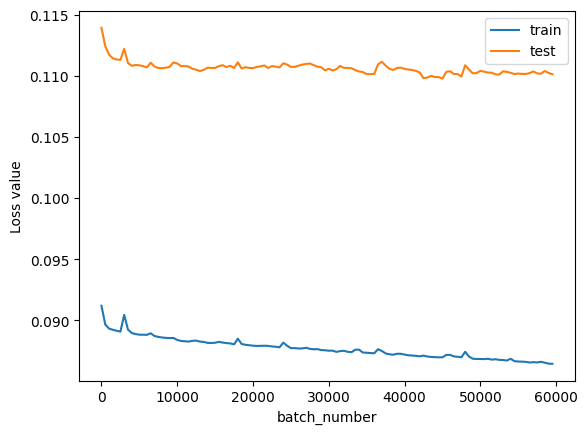

In [10]:
# Evaluate the initial model
logits_train = model(x_train)
loss_init_train = loss(y_train, logits_train).numpy()
logits_test = model(x_test)
loss_init_test = loss(y_test, logits_test).numpy()

print(f"Initialement on a une perte de {loss_init_train} sur le x_train ")
print(f"Initialement on a une perte de {loss_init_test} sur le x_test ")

# Stochastic gradient algorithm
n_data, n_features = x_train.shape
n_epoch = 20
batch_size = 20
eps = 0.01  # critère d'arrêt si jamais on a suffisamment optimisé un batch

# Define the step
a = 0.1
gamma = a / np.array([ np.sqrt(k+1) for k in range(n_data//batch_size)])

print(
    f"We will have {n_data/batch_size} iterations with {batch_size = } per epoch. We will have {n_epoch = } "
)
loss_tab_train = []
loss_tab_test = []

for epoch in range(n_epoch):

    print(f"We are at {epoch = }")

    rand_index = np.random.randint(0, n_data, n_data)  #Index to select
    #Shuffled data
    x_sgd = x_train[rand_index]
    y_sgd = y_train[rand_index]

    for k_batch in range(n_data // batch_size):
        with tf.GradientTape() as tape:
            sample = x_sgd[k_batch * batch_size:(k_batch + 1) *
                           batch_size]  #sample = batch
            logits = model(sample)
            loss_value = loss(
                y_sgd[k_batch * batch_size:(k_batch + 1) * batch_size], logits)
        grad = tape.gradient(loss_value, model.trainable_weights)
        multiply_gradient(-1 * gamma[k_batch] / batch_size, grad)
        update_weights(model, grad)

        # Log every 500 batches.
        if k_batch % 500 == 0:
            #compute the loss on the train sample
            logits_train = model(x_train)
            global_loss_train = loss(y_train, logits_train).numpy()
            loss_tab_train.append(global_loss_train)
            #compute loss on the test sample
            logits_test = model(x_test)
            global_loss_test = loss(y_test, logits_test).numpy()
            loss_tab_test.append(global_loss_test)

# Evaluate the final model
logits_train = model(x_train)
loss_final_train = loss(y_train, logits_train).numpy()
logits_test = model(x_test)
loss_final_test = loss(y_test, logits_test).numpy()

print(f"Finalement on a une perte de {loss_final_train} sur le x_train ")
print(f"Finalement on a une perte de {loss_final_test} sur le x_test ")

fig, ax = plt.subplots()
ax.plot(loss_tab_train, label='train')
ax.plot(loss_tab_test, label='test')
ax.set_xlabel("batch_number")
ax.set_xticklabels([int(500*(k)) for k in ax.get_xticks()])
ax.set_ylabel("Loss value")
plt.legend()
plt.show()